#Bike Sales baseline regression model

###Problem statement
The model need to predict what effect does order quantity has on average bike sales?

###Hyphothesis

####trained dataset will have the highest average sales performance in all evaluation metrics.



##Import necessary libraries

In [ ]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

##Load data

In [ ]:
df=pd.read_csv('/content/bike sales.csv')

#data Preprocessing

In [ ]:
#display the first 5 dataset
df.head()

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418


In [ ]:
#display columns in the data
df.columns

Index(['Date', 'Day', 'Month', 'Year', 'Customer_Age', 'Age_Group',
       'Customer_Gender', 'Country', 'State', 'Product_Category',
       'Sub_Category', 'Product', 'Order_Quantity', 'Unit_Cost', 'Unit_Price',
       'Profit', 'Cost', 'Revenue'],
      dtype='object')

In [ ]:
#display the number of rows and columns in the data
df.shape

(113036, 18)



```
ta dataset have 113036 rows and 18 columns
```



In [ ]:
#summary of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113036 entries, 0 to 113035
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Date              113036 non-null  object
 1   Day               113036 non-null  int64 
 2   Month             113036 non-null  object
 3   Year              113036 non-null  int64 
 4   Customer_Age      113036 non-null  int64 
 5   Age_Group         113036 non-null  object
 6   Customer_Gender   113036 non-null  object
 7   Country           113036 non-null  object
 8   State             113036 non-null  object
 9   Product_Category  113036 non-null  object
 10  Sub_Category      113036 non-null  object
 11  Product           113036 non-null  object
 12  Order_Quantity    113036 non-null  int64 
 13  Unit_Cost         113036 non-null  int64 
 14  Unit_Price        113036 non-null  int64 
 15  Profit            113036 non-null  int64 
 16  Cost              113036 non-null  int

In [ ]:
#check null values
df.isnull().sum()

Date                0
Day                 0
Month               0
Year                0
Customer_Age        0
Age_Group           0
Customer_Gender     0
Country             0
State               0
Product_Category    0
Sub_Category        0
Product             0
Order_Quantity      0
Unit_Cost           0
Unit_Price          0
Profit              0
Cost                0
Revenue             0
dtype: int64

In [ ]:
df.duplicated().sum()

1000

In [ ]:
# Check for duplicate rows
duplicate_rows = df[df.duplicated()]

In [ ]:
duplicate_rows.head()

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
1021,2013-12-19,19,December,2013,22,Youth (<25),M,Australia,New South Wales,Accessories,Bike Stands,All-Purpose Bike Stand,9,59,159,714,531,1245
1091,2015-09-30,30,September,2015,42,Adults (35-64),F,Australia,Victoria,Accessories,Bottles and Cages,Mountain Bottle Cage,5,4,10,20,20,40
1093,2013-10-24,24,October,2013,42,Adults (35-64),F,Australia,Victoria,Accessories,Bottles and Cages,Mountain Bottle Cage,2,4,10,8,8,16
1095,2015-10-24,24,October,2015,42,Adults (35-64),F,Australia,Victoria,Accessories,Bottles and Cages,Mountain Bottle Cage,1,4,10,4,4,8
1193,2016-01-15,15,January,2016,42,Adults (35-64),M,France,Seine Saint Denis,Accessories,Bottles and Cages,Water Bottle - 30 oz.,14,2,5,29,28,57


In [ ]:
#remove all duplicated rows
df.drop_duplicates(inplace=True)

In [ ]:
df.shape

(112036, 18)

In [ ]:
#remove the outliers
q1 = df['Revenue'].quantile(0.25)
q3 = df['Revenue'].quantile(0.75)

iqr=q3-q1

lower_quantile=q1-1.5*iqr
upper_quantile=q3+1.5*iqr

outliers=df['Revenue'][(df['Revenue']<lower_quantile)|(df['Revenue']>upper_quantile)]
print('Outliers:', outliers)

Outliers: 2          2401
3          2088
8          2086
9          1991
30         2376
          ...  
112069     4577
112070     2289
112071     4577
112072    54069
112073    58074
Name: Revenue, Length: 14603, dtype: int64


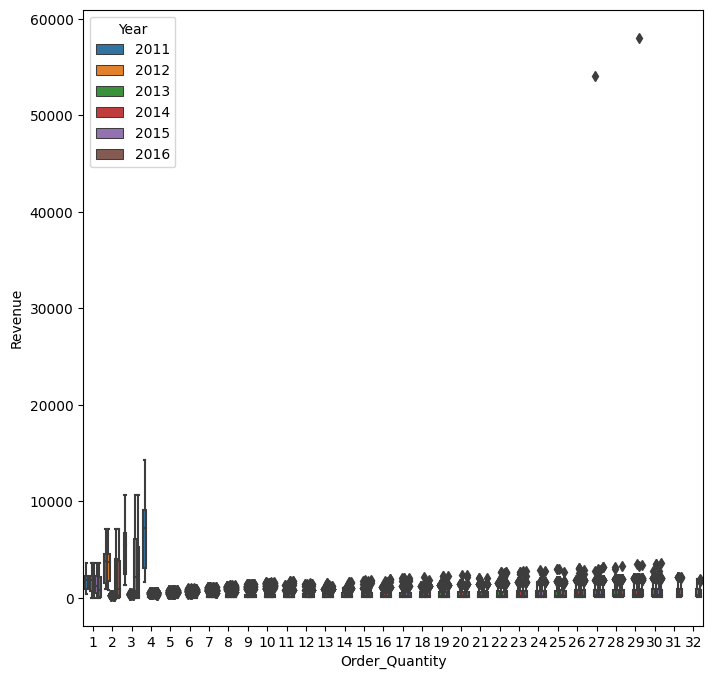

In [ ]:
#display outliers in a box plot
plt.figure(figsize=(8,8))
sns.boxplot(x=df['Order_Quantity'], y=df['Revenue'], hue=df['Year'])
plt.show()



```
Around 15,000 outliers exist.

Box plot medians show significant variation, which implies variations in average sales among order quantities over this years.
```



In [ ]:
#identify datatypes
df.dtypes

Date                object
Day                  int64
Month               object
Year                 int64
Customer_Age         int64
Age_Group           object
Customer_Gender     object
Country             object
State               object
Product_Category    object
Sub_Category        object
Product             object
Order_Quantity       int64
Unit_Cost            int64
Unit_Price           int64
Profit               int64
Cost                 int64
Revenue              int64
dtype: object

In [ ]:
#display all the categorical columns
cat_values=df[['Age_Group','Customer_Gender','Country','State','Product_Category',
               'Sub_Category','Product','Date','Month']]

In [ ]:
#display all uniqueness in categorical columns
cat_values.nunique()

Age_Group              4
Customer_Gender        2
Country                6
State                 53
Product_Category       3
Sub_Category          17
Product              130
Date                1884
Month                 12
dtype: int64

In [ ]:
#statistical summary of numerical values
df.describe()

,Day,Year,Customer_Age,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
count,112036.000000,112036.000000,112036.000000,112036.000000,112036.000000,112036.000000,112036.000000,112036.000000,112036.000000
mean,15.665607,2014.400925,35.919508,11.904254,267.819603,453.850628,286.035194,471.103333,757.138527
std,8.781485,1.273327,11.016543,9.564877,550.218722,922.751848,454.852634,886.971635,1312.061623
min,1.000000,2011.000000,17.000000,1.000000,1.000000,2.000000,-30.000000,1.000000,2.000000
25%,8.000000,2013.000000,28.000000,2.000000,2.000000,5.000000,29.000000,28.000000,64.000000
50%,16.000000,2014.000000,35.000000,10.000000,9.000000,25.000000,103.000000,112.000000,226.000000
75%,23.000000,2016.000000,43.000000,20.000000,42.000000,70.000000,360.000000,442.000000,806.000000
max,31.000000,2016.000000,87.000000,32.000000,2171.000000,3578.000000,15096.000000,42978.000000,58074.000000


#Create baseline model

In [ ]:
#identify actual value
X=df[['Order_Quantity']]

In [ ]:
#identify target value
y=df['Revenue']

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#check sales average of target value
mean_bike_sales = y.mean()
print(mean_bike_sales)

757.1385269020672


In [ ]:
# Create a baseline model that predicts the mean for all values in dataset
predictions=[mean_bike_sales]*len(y)

In [ ]:
predictions

[757.1385269020672,
 757.1385269020672,
 757.1385269020672,
 757.1385269020672,
 757.1385269020672,
 757.1385269020672,
 757.1385269020672,
 757.1385269020672,
 757.1385269020672,
 757.1385269020672,
 757.1385269020672,
 757.1385269020672,
 757.1385269020672,
 757.1385269020672,
 757.1385269020672,
 757.1385269020672,
 757.1385269020672,
 757.1385269020672,
 757.1385269020672,
 757.1385269020672,
 757.1385269020672,
 757.1385269020672,
 757.1385269020672,
 757.1385269020672,
 757.1385269020672,
 757.1385269020672,
 757.1385269020672,
 757.1385269020672,
 757.1385269020672,
 757.1385269020672,
 757.1385269020672,
 757.1385269020672,
 757.1385269020672,
 757.1385269020672,
 757.1385269020672,
 757.1385269020672,
 757.1385269020672,
 757.1385269020672,
 757.1385269020672,
 757.1385269020672,
 757.1385269020672,
 757.1385269020672,
 757.1385269020672,
 757.1385269020672,
 757.1385269020672,
 757.1385269020672,
 757.1385269020672,
 757.1385269020672,
 757.1385269020672,
 757.1385269020672,


In [ ]:
# Evaluate the model's performance
mae = mean_absolute_error(y, predictions)
mse = mean_squared_error(y, predictions)
rmse = mean_squared_error(y, predictions, squared=False)
rmsle = np.sqrt(mean_squared_error(np.log1p(y), np.log1p(predictions)))

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"RMSLE of Baseline Model: {rmsle:.4f}")

Mean Absolute Error (MAE): 810.96
Mean Squared Error (MSE): 1721490.34
Root Mean Squared Error (RMSE): 1312.06
RMSLE of Baseline Model: 2.0691


In [ ]:
# Calculate mean values for the training set
train_sales_mean = y_train.mean()

In [ ]:
# Create a baseline model that predicts the mean of the training set for all samples
y_pred_train = [train_sales_mean] * len(y_train)

In [ ]:
# Evaluate the model's performance
mae = mean_absolute_error(y_train, y_pred_train)
mse = mean_squared_error(y_train, y_pred_train)
rmse = mean_squared_error(y_train, y_pred_train, squared=False)
rmsle = np.sqrt(mean_squared_error(np.log1p(y_train), np.log1p(y_pred_train)))

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"RMSLE of Baseline Model: {rmsle:.4f}")

Mean Absolute Error (MAE): 814.04
Mean Squared Error (MSE): 1720124.15
Root Mean Squared Error (RMSE): 1311.54
RMSLE of Baseline Model: 2.0725


In [ ]:
df['train_sales_mean'] = train_sales_mean

In [ ]:
df.head()

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue,train_sales_mean
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950,759.071384
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950,759.071384
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401,759.071384
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088,759.071384
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418,759.071384


In [ ]:
# Replace the y_test values with the mean of the training set
y_test_mean = pd.Series([train_sales_mean] * len(y_test), index=y_test.index)

y_test = pd.DataFrame(y_test)
y_test['train_sales_mean'] = y_test_mean
y_test


,Revenue,train_sales_mean
85392,78,759.071384
56313,1085,759.071384
27751,580,759.071384
7501,101,759.071384
24342,240,759.071384
...,...,...
23470,170,759.071384
85863,70,759.071384
66249,529,759.071384
49992,1790,759.071384


In [ ]:
# Evaluate the model's performance
mae = mean_absolute_error(y_test['Revenue'], y_test['train_sales_mean'])
mse = mean_squared_error(y_test['Revenue'], y_test['train_sales_mean'])
rmse = mean_squared_error(y_test['Revenue'], y_test['train_sales_mean'], squared=False)
rmsle = np.sqrt(mean_squared_error(np.log1p(y_test['Revenue']), np.log1p(y_test['train_sales_mean'])))

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"RMSLE of Baseline Model: {rmsle:.4f}")

Mean Absolute Error (MAE): 803.22
Mean Squared Error (MSE): 1726973.52
Root Mean Squared Error (RMSE): 1314.14
RMSLE of Baseline Model: 2.0631


##Conclusion

In this baseline regression study, I investigate the relationship that exists between one independent variable (order quantity) and the dependent variable (revenue).

Considering that 810.96 is the real value's of mae and RMSLE is 2.0691. The model exhibits overfitting since the trained y value's mean absolute error (mae) is 814.04 and RMSLE of 2.0725, more than the target value. It follows that the testing set's 803.22 and RMSLE of 2.0631 score indicates a very good model fit compared to the training set.

The model appears to suit the training data reasonably well based on the mean square error, as the targeted value is higher (1721490.34) than the trained value (1720124.15). The testing value's mse is overfitting to the training data because it is higher than the training value with (1726973.52).

considering the target value of 1312.06 for the rmse.The test's rmse, at 1314.14, indicates that the trained value is overfitting, whereas the trained value's rmse, at 1311.54, indicates that it fits perfectly.

##Recommnedation

Next time it will be crucial to investigate methods like regularization, feature selection, or hyperparameter tweaking to enhance the model's capacity for generalization, avoid overfitting, and boost prediction accuracy on data that hasn't been seen.